# Plot the time series correctly using matplotlib

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [41]:
import datetime
from dateutil import parser  # very usefull time format smart parser

In [42]:
import os

In [43]:
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days=mdates.DayLocator()  # every day
hour=mdates.HourLocator()  # every day
yearsFmt = mdates.DateFormatter('%Y')

In [44]:
%config InlineBackend.rc = {}
mpl.rc_file("../templates/matplotlibrc")

In [45]:
!ls ..

HoloLocation
README.md
README.md - Tutorial to use the python tools for atmospheric analysis.md
README.md~
ana_01jun17
ana_02jun17
ana_03jun17
ana_04jun17
ana_05jun17
ana_06jun17
ana_08jun17
ana_09jun17
ana_10jun17
ana_12jun17
ana_13jun17
ana_26may17
ana_28may17
ana_29may17
ana_30may17
ana_31may17
common_tools
common_tools_dontknow
common_tools_oldgood
mathematica
spectrumsim
templates
weather


In [46]:
pandasweatherfile='ctioweatherinfo_jun2017.csv'

In [47]:
df=pd.read_csv(pandasweatherfile)

In [48]:
df

,Unnamed: 0,DATE,H,P,T
0,0,2017-05-28T01:36:40.705,60.0,779.0,5.6
1,1,2017-05-28T01:41:52.197,60.0,780.0,5.6
2,2,2017-05-28T01:46:06.150,59.0,779.0,5.9
3,3,2017-05-28T01:50:31.257,57.0,779.0,5.9
4,4,2017-05-28T01:58:18.598,0.0,779.0,5.9
5,5,2017-05-28T02:03:27.503,0.0,779.0,5.9
6,6,2017-05-28T02:06:07.849,51.0,779.0,6.1
7,7,2017-05-28T02:07:46.850,0.0,779.0,6.2
8,8,2017-05-28T02:09:32.599,53.0,779.0,6.0
9,9,2017-05-28T02:10:48.245,0.0,779.0,6.0


In [49]:
all_dates=df["DATE"]

In [50]:
H=df["H"]
P=df["P"]
T=df["T"]

In [51]:
NDATA=len(all_dates)
all_dt= [ parser.parse(all_dates[i]) for i in range(NDATA)]

In [52]:
all_dt

[datetime.datetime(2017, 5, 28, 1, 36, 40, 705000),
 datetime.datetime(2017, 5, 28, 1, 41, 52, 197000),
 datetime.datetime(2017, 5, 28, 1, 46, 6, 150000),
 datetime.datetime(2017, 5, 28, 1, 50, 31, 257000),
 datetime.datetime(2017, 5, 28, 1, 58, 18, 598000),
 datetime.datetime(2017, 5, 28, 2, 3, 27, 503000),
 datetime.datetime(2017, 5, 28, 2, 6, 7, 849000),
 datetime.datetime(2017, 5, 28, 2, 7, 46, 850000),
 datetime.datetime(2017, 5, 28, 2, 9, 32, 599000),
 datetime.datetime(2017, 5, 28, 2, 10, 48, 245000),
 datetime.datetime(2017, 5, 28, 2, 29, 50, 306000),
 datetime.datetime(2017, 5, 28, 2, 34, 55, 900000),
 datetime.datetime(2017, 5, 28, 2, 37, 16, 597000),
 datetime.datetime(2017, 5, 28, 2, 52, 46, 499000),
 datetime.datetime(2017, 5, 28, 3, 22, 17, 54000),
 datetime.datetime(2017, 5, 28, 3, 26, 41, 755000),
 datetime.datetime(2017, 5, 28, 3, 47, 59, 99000),
 datetime.datetime(2017, 5, 28, 4, 7, 3, 97000),
 datetime.datetime(2017, 5, 28, 4, 11, 36, 802000),
 datetime.datetime(2017

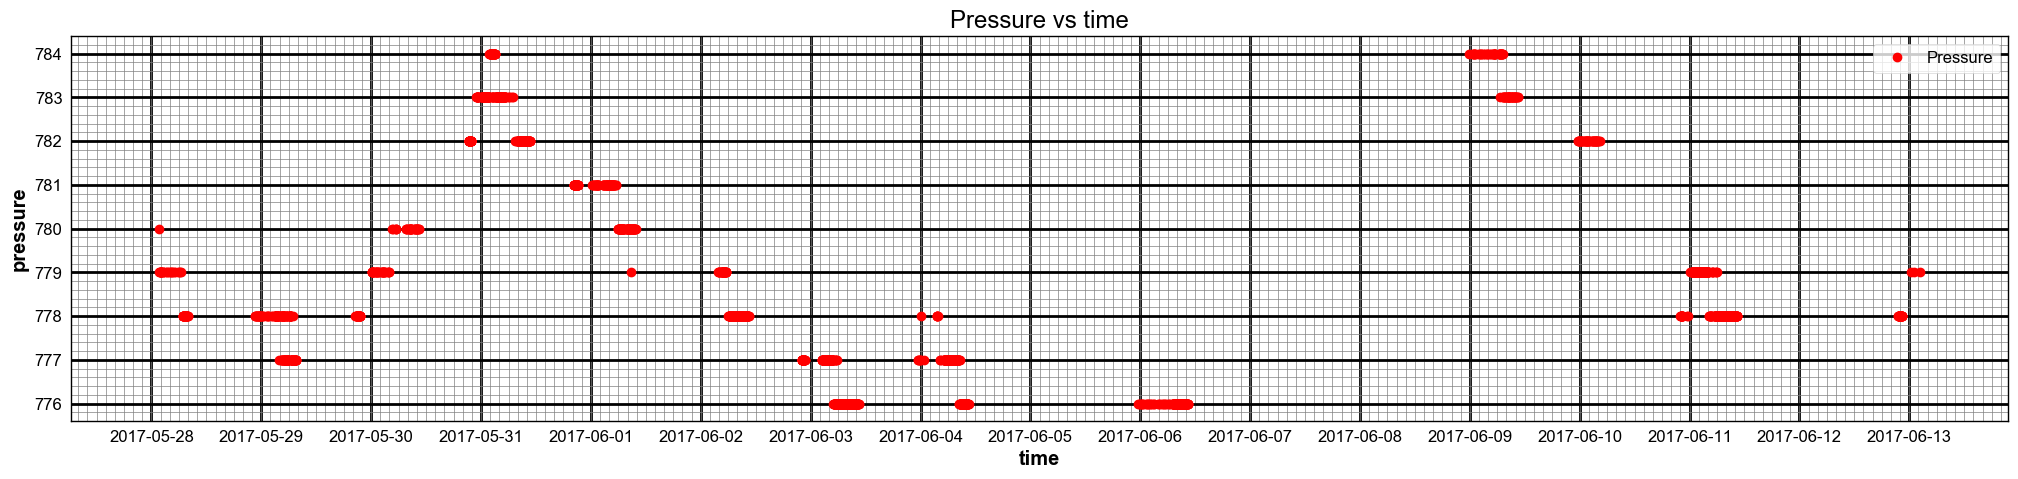

In [53]:
fig=plt.figure(figsize=(25,5))

ax=fig.add_subplot(1,1,1)
ax.plot_date(all_dt, P,marker='o',color='red',lw=0,label='Pressure',linewidth=3)


date_range = all_dt[NDATA-1] - all_dt[0]

if date_range > datetime.timedelta(days = 1):
    ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.get_xaxis().set_minor_locator(mdates.HourLocator(byhour=range(0,24,2)))
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
else:
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_xaxis().set_minor_locator(mdates.MinuteLocator(byminute=range(0,60,5)))
    
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

ax.grid(b=True, which='major', color='k', linewidth=2.0)
ax.grid(b=True, which='minor', color='grey', linewidth=0.5)
ax.set_ylabel('pressure')
ax.set_xlabel('time')


title='Pressure vs time'
plt.title(title)
plt.legend(loc='best')

figfilename='pressurevstime.pdf'
fig.savefig(figfilename)

In [54]:
def PlotTimeSerie(all_dt,data,title,xtitle,ytitle,labeltitle,thecolor,figfilename):
    
    
        
    fig=plt.figure(figsize=(25,5))

    ax=fig.add_subplot(1,1,1)
    ax.plot_date(all_dt, data,marker='o',color=thecolor,lw=0,label=labeltitle,linewidth=3)


    date_range = all_dt[NDATA-1] - all_dt[0]

    if date_range > datetime.timedelta(days = 1):
        ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=range(1,32), interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        ax.get_xaxis().set_minor_locator(mdates.HourLocator(byhour=range(0,24,2)))
        #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    else:
        ax.xaxis.set_major_locator(mdates.HourLocator(byhour=range(0,24,2)))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_xaxis().set_minor_locator(mdates.MinuteLocator(byminute=range(0,60,5)))
    
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())

    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='grey', linewidth=0.5)
    ax.set_ylabel(ytitle)
    ax.set_xlabel(xtitle)


  
    plt.title(title)
    plt.legend(loc='best')


    fig.savefig(figfilename)

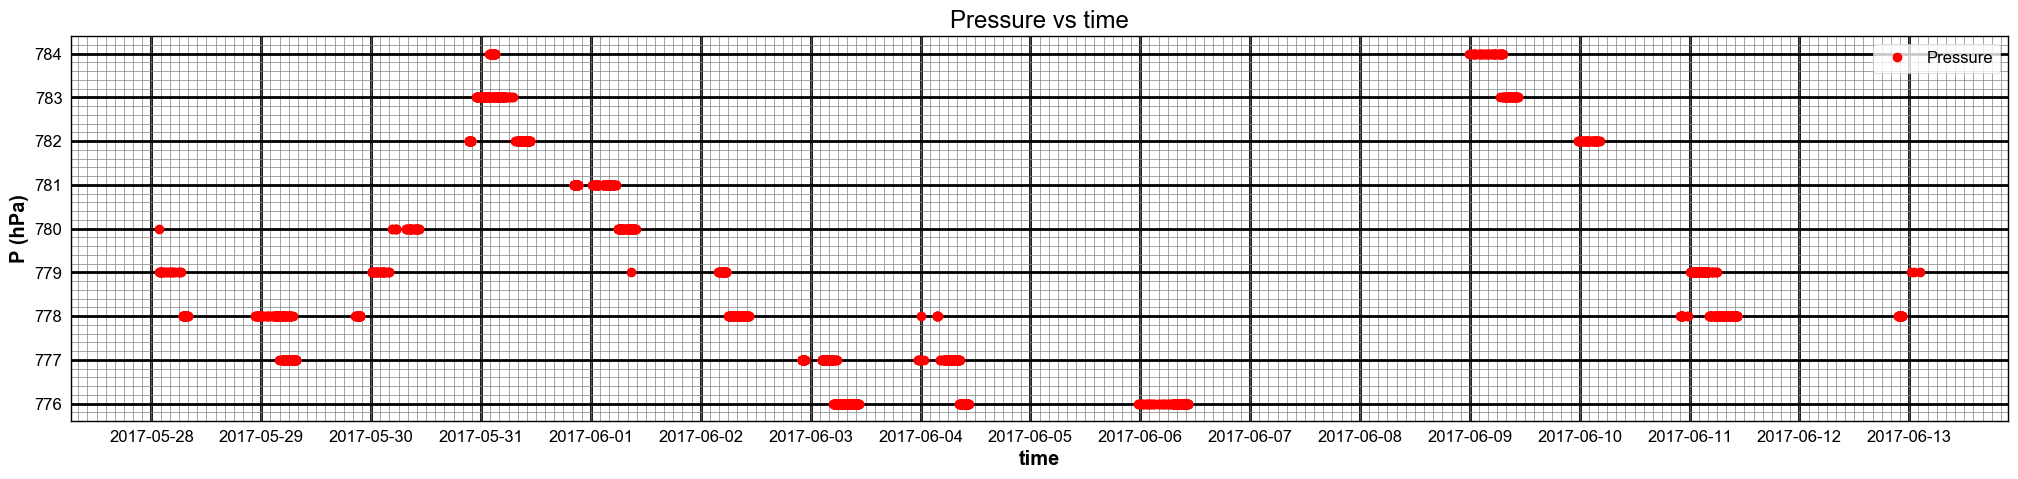

In [55]:
PlotTimeSerie(all_dt,P,"Pressure vs time","time","P (hPa)","Pressure","red","press_vs_time.pdf")

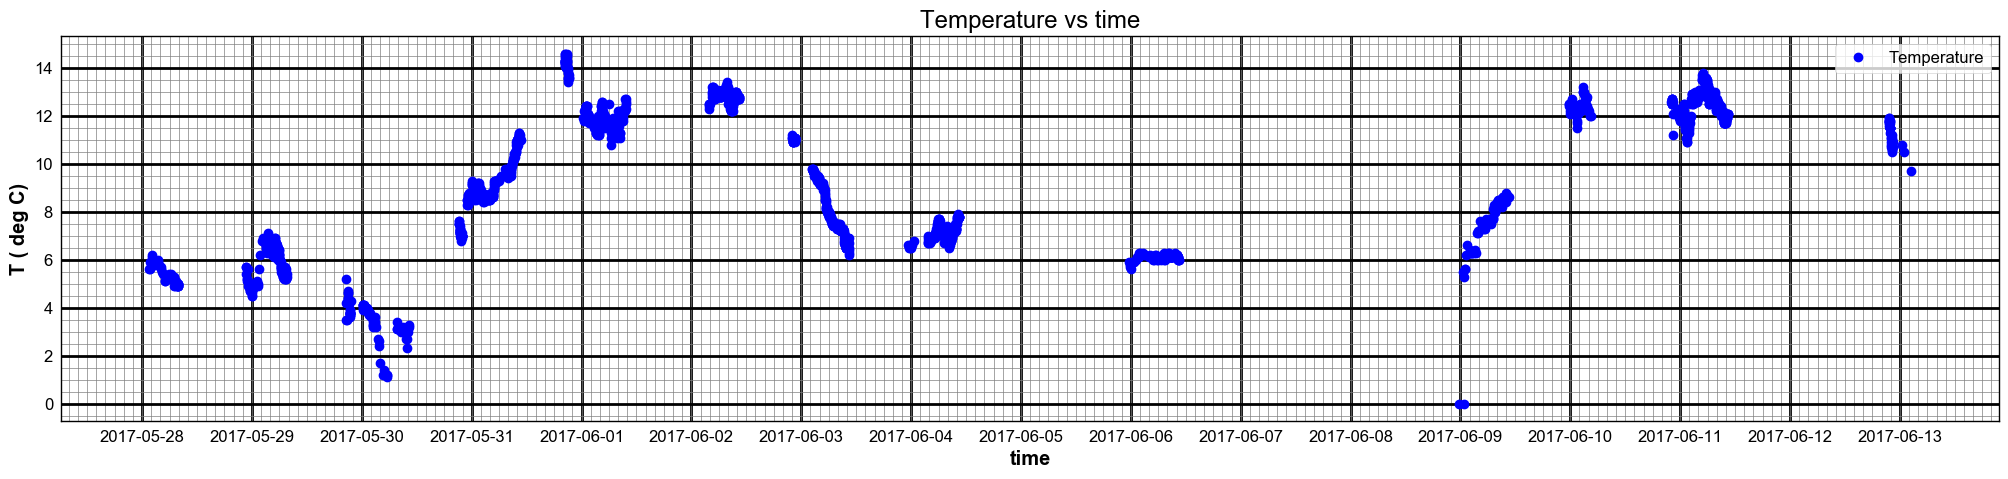

In [56]:
PlotTimeSerie(all_dt,T,"Temperature vs time","time","T ( deg C)","Temperature","blue","temp_vs_time.pdf")

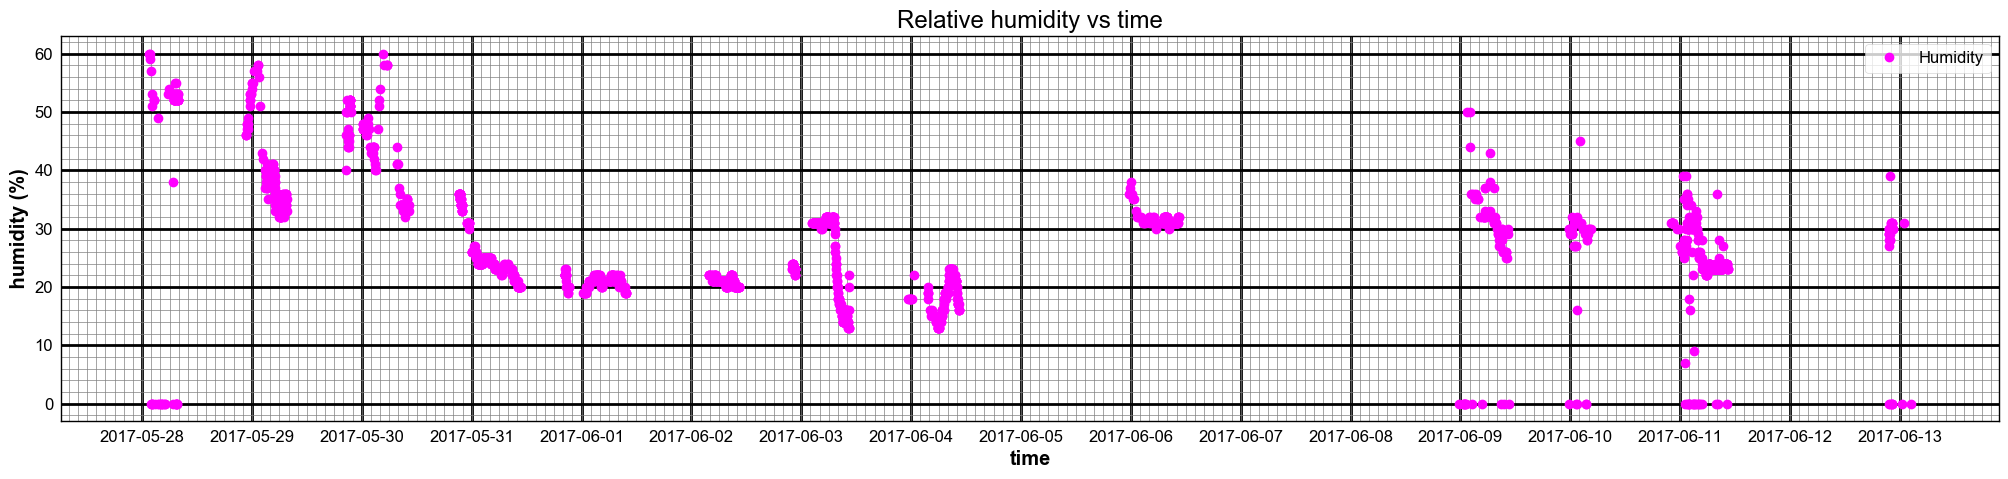

In [57]:
PlotTimeSerie(all_dt,H,"Relative humidity vs time","time"," humidity (%) ","Humidity","magenta","hum_vs_time.pdf")